In [24]:
    import pandas as pd
    import datetime
    from shapely.geometry import Point, Polygon
    import datetime
    from shapely import wkt
    import geopandas as gpd
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import seaborn as sns; sns.set()
    import csv

In [25]:
    df = pd.read_csv(r'combined_tourists.csv', encoding='utf-8')
    df[df['coordinates'].notna()]
    df['coordinates'] = df.coordinates.str.replace('type,?' , '')
    df['coordinates'] = df.coordinates.str.replace('Point,?' , '')
    df['coordinates'] = df.coordinates.str.replace('coordinates,?' , '')
    df['coordinates'] = df.coordinates.str.replace('{,?' , '')
    df['coordinates'] = df.coordinates.str.replace(':,?' , '')
    df['coordinates'] = df.coordinates.str.replace('\],?' , '')
    df['coordinates'] = df.coordinates.str.replace(',?' , '')
    df['coordinates'] = df.coordinates.str.replace('},?' , '')
    df['coordinates'] = df.coordinates.str.replace("'',?" , "")
    df['coordinates'] = df.coordinates.str.replace('\[,?' , '')
    df[['a','b','c','LON','LAT']] = df.coordinates.str.split(" ",expand=True,)
    df.drop(['a', 'b','c'], axis = 1)
    df.dropna(subset = ["LAT"], inplace=True)
    df['LON'] = pd.to_numeric(df['LON'],errors='coerce')
    df['LAT'] = pd.to_numeric(df['LAT'],errors='coerce')
    df.dropna(subset = ["LAT"], inplace=True)
    

In [26]:
    from shapely.geometry import Point, Polygon
    import datetime
    from shapely import wkt
    import geopandas as gpd
    from shapely.geometry import Point, Polygon
    def check(p):
        from shapely.geometry import Point, Polygon
        # Create a Polygon
        coords = coords = [(77.15, 28.45), (77.30, 28.45), (77.15, 29), (77.30, 29)]
        poly = Polygon(coords)
        y = p.within(poly)
        return(y)
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LON, df.LAT))
    df['val']=df['geometry'].apply(check)

    
    



In [27]:
df.drop(df[df['val'] == False].index, inplace=True)
df

,id,created_at,text,coordinates,user_described_location,a,b,c,LON,LAT,geometry,val
3032,1314494825962463232,2020-10-09 09:16:03,Just posted a video @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3033,1314425757985198081,2020-10-09 04:41:36,Just posted a video @ Red Fort https://t.co/KR...,77.24079609 28.65607021,NaN,,,,77.240796,28.656070,POINT (77.24080 28.65607),True
3047,1314417502600990722,2020-10-09 04:08:47,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3048,1314417307297472514,2020-10-09 04:08:01,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3049,1314417160547184640,2020-10-09 04:07:26,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
...,...,...,...,...,...,...,...,...,...,...,...,...
704478,1207489681161674752,2019-12-19 02:35:48,"#liveselfie #morning\r\n#toocold @ RK Puram, S...",77.18809 28.56158,NaN,,,,77.188090,28.561580,POINT (77.18809 28.56158),True
704496,1205815385590767617,2019-12-14 11:42:45,#shanimandir @ Sports Club Khaspur https://t.c...,77.1840257 28.5649359,NaN,,,,77.184026,28.564936,POINT (77.18403 28.56494),True
704612,1193781934637252608,2019-11-11 06:46:07,#liveselfie @ Cro Itbp https://t.co/9RODp4IMHt,77.18439333 28.56540475,NaN,,,,77.184393,28.565405,POINT (77.18439 28.56540),True
704670,1188655260383862785,2019-10-28 03:14:32,#liveselfie @ Cro Itbp https://t.co/yKdeyHtsb6,77.18439333 28.56540475,NaN,,,,77.184393,28.565405,POINT (77.18439 28.56540),True


In [28]:
# Variable with the Longitude and Latitude
X=df.loc[:,['id','LAT','LON']]
X.head(10)

,id,LAT,LON
3032,1314494825962463232,28.656387,77.237037
3033,1314425757985198081,28.656070,77.240796
3047,1314417502600990722,28.656387,77.237037
3048,1314417307297472514,28.656387,77.237037
3049,1314417160547184640,28.656387,77.237037
3050,1314417059451801603,28.656387,77.237037
3051,1314416972147417088,28.656387,77.237037
3052,1314416796817141760,28.656387,77.237037
3053,1314416706710888453,28.656387,77.237037
3054,1314416634233270281,28.656387,77.237037


In [29]:
X.to_numpy()

array([[1.31449483e+18, 2.86563870e+01, 7.72370370e+01],
       [1.31442576e+18, 2.86560702e+01, 7.72407961e+01],
       [1.31441750e+18, 2.86563870e+01, 7.72370370e+01],
       ...,
       [1.19378193e+18, 2.85654047e+01, 7.71843933e+01],
       [1.18865526e+18, 2.85654047e+01, 7.71843933e+01],
       [1.17232870e+18, 2.85654047e+01, 7.71843933e+01]])

In [30]:
from kneed import KneeLocator


from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score




import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization

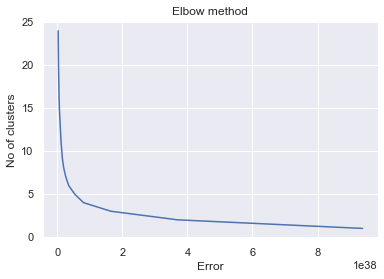

In [31]:
#now i am going to check the no of cluster needed our data by using elbow method
Error =[]
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(Error,range(1, 25))
plt.title('Elbow method')
plt.xlabel('Error')
plt.ylabel('No of clusters')
plt.show()

In [32]:
K_clusters = range(1,50)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['LAT']]
X_axis = df[['LON']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

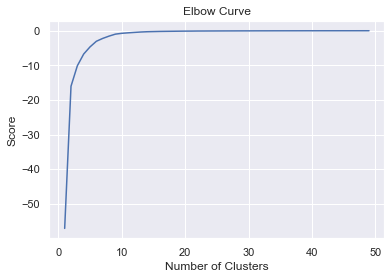

In [33]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [34]:
kmeans = KMeans(n_clusters = 11, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,id,LAT,LON,cluster_label
3032,1314494825962463232,28.656387,77.237037,8
3033,1314425757985198081,28.656070,77.240796,8
3047,1314417502600990722,28.656387,77.237037,8
3048,1314417307297472514,28.656387,77.237037,8
3049,1314417160547184640,28.656387,77.237037,8
3050,1314417059451801603,28.656387,77.237037,8
3051,1314416972147417088,28.656387,77.237037,8
3052,1314416796817141760,28.656387,77.237037,8
3053,1314416706710888453,28.656387,77.237037,8
3054,1314416634233270281,28.656387,77.237037,8


In [35]:
from sklearn.metrics import silhouette_score
label=kmeans.predict(X[X.columns[1:3]])
print({silhouette_score(X[X.columns[1:3]], label)})


{0.7067424772237159}


In [36]:
#Calinski Harabasz
from sklearn.metrics import calinski_harabasz_score
kmeans_calinski_harabasz_score = calinski_harabasz_score(X[X.columns[1:3]], label)
kmeans_calinski_harabasz_score


63442.83753315404

In [37]:
#davies_bouldin_score

from sklearn.metrics import davies_bouldin_score

kmeans_davies_bouldin_score = davies_bouldin_score(X[X.columns[1:3]], label)

kmeans_davies_bouldin_score

0.5939452682978179

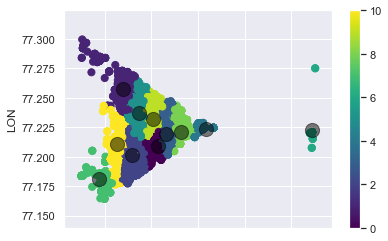

In [38]:
X.plot.scatter(x = 'LAT', y = 'LON', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [39]:
df.head(5)

,id,created_at,text,coordinates,user_described_location,a,b,c,LON,LAT,geometry,val
3032,1314494825962463232,2020-10-09 09:16:03,Just posted a video @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3033,1314425757985198081,2020-10-09 04:41:36,Just posted a video @ Red Fort https://t.co/KR...,77.24079609 28.65607021,NaN,,,,77.240796,28.656070,POINT (77.24080 28.65607),True
3047,1314417502600990722,2020-10-09 04:08:47,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3048,1314417307297472514,2020-10-09 04:08:01,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3049,1314417160547184640,2020-10-09 04:07:26,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True


In [40]:
centers = kmeans.cluster_centers_
print(centers)

[[28.61325933 77.20892407]
 [28.54016502 77.2571085 ]
 [28.55793549 77.20151544]
 [28.63223769 77.21962085]
 [28.71742555 77.22360677]
 [28.57276539 77.23679582]
 [28.94531681 77.2228888 ]
 [28.48687072 77.18116736]
 [28.66360925 77.22072358]
 [28.60264267 77.23193291]
 [28.52603867 77.21061344]]


In [41]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
coords = df[['LAT', 'LON']].values
df

,id,created_at,text,coordinates,user_described_location,a,b,c,LON,LAT,geometry,val
3032,1314494825962463232,2020-10-09 09:16:03,Just posted a video @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3033,1314425757985198081,2020-10-09 04:41:36,Just posted a video @ Red Fort https://t.co/KR...,77.24079609 28.65607021,NaN,,,,77.240796,28.656070,POINT (77.24080 28.65607),True
3047,1314417502600990722,2020-10-09 04:08:47,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3048,1314417307297472514,2020-10-09 04:08:01,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
3049,1314417160547184640,2020-10-09 04:07:26,Just posted a photo @ Lal Qila (Red Fort) Chan...,77.23703704 28.65638698,NaN,,,,77.237037,28.656387,POINT (77.23704 28.65639),True
...,...,...,...,...,...,...,...,...,...,...,...,...
704478,1207489681161674752,2019-12-19 02:35:48,"#liveselfie #morning\r\n#toocold @ RK Puram, S...",77.18809 28.56158,NaN,,,,77.188090,28.561580,POINT (77.18809 28.56158),True
704496,1205815385590767617,2019-12-14 11:42:45,#shanimandir @ Sports Club Khaspur https://t.c...,77.1840257 28.5649359,NaN,,,,77.184026,28.564936,POINT (77.18403 28.56494),True
704612,1193781934637252608,2019-11-11 06:46:07,#liveselfie @ Cro Itbp https://t.co/9RODp4IMHt,77.18439333 28.56540475,NaN,,,,77.184393,28.565405,POINT (77.18439 28.56540),True
704670,1188655260383862785,2019-10-28 03:14:32,#liveselfie @ Cro Itbp https://t.co/yKdeyHtsb6,77.18439333 28.56540475,NaN,,,,77.184393,28.565405,POINT (77.18439 28.56540),True


In [42]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 6


In [43]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)


In [44]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'LON':lons, 'LAT':lats})
rep_points

,LON,LAT
0,77.217015,28.608000
1,77.287250,28.478730
2,77.220730,28.945120
3,77.224390,28.732810
4,77.205014,28.473346
5,77.274967,28.951562


In [45]:
rs = rep_points.apply(lambda row: df[(df['LAT']==row['LAT']) & (df['LON']==row['LON'])].iloc[0], axis=1)

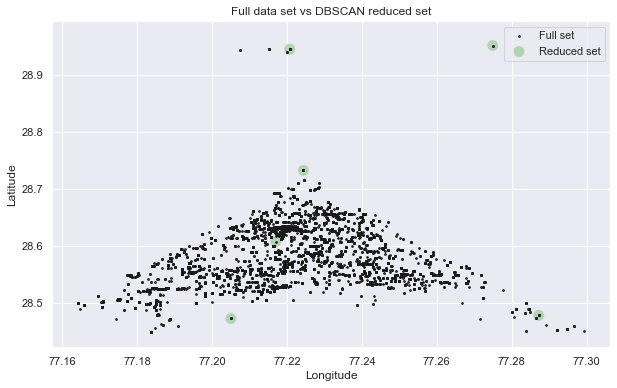

In [46]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['LON'], rs['LAT'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['LON'], df['LAT'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [47]:
dbscan_silhouette = silhouette_score(X[X.columns[1:3]], db.labels_)
dbscan_silhouette

0.45443408701481436

In [48]:
dbscan_calinski_harabasz_score = calinski_harabasz_score(X[X.columns[1:3]], db.labels_)
dbscan_calinski_harabasz_score


699.2347857613584

In [49]:
dbscan_davies_bouldin_score = davies_bouldin_score(X[X.columns[1:3]], db.labels_)

dbscan_davies_bouldin_score

0.2462010440773832

In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

In [51]:
ms = MeanShift()
ms.fit(X[X.columns[1:3]])

MeanShift()

In [52]:
ms.cluster_centers_


array([[28.62670634, 77.21780121],
       [28.56453641, 77.22072151],
       [28.53662674, 77.20900407],
       [28.59145472, 77.23144157],
       [28.71377913, 77.22334942],
       [28.45607614, 77.18491362],
       [28.47462477, 77.28708814],
       [28.94481722, 77.21872258],
       [28.9515616 , 77.2749666 ]])

In [53]:
meanshift_silhouette = silhouette_score(X[X.columns[1:3]], ms.labels_)
meanshift_silhouette

0.49680494481655024

In [54]:
ms_calinski_harabasz_score = calinski_harabasz_score(X[X.columns[1:3]], ms.labels_)
ms_calinski_harabasz_score

19879.727636162843

In [55]:
ms_davies_bouldin_score = davies_bouldin_score(X[X.columns[1:3]], ms.labels_)

ms_davies_bouldin_score

0.6544927241980759

NameError: name 'y' is not defined

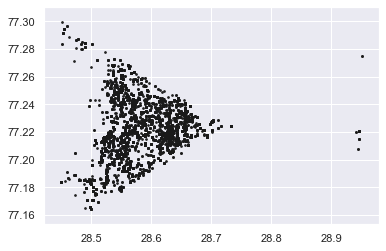

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[X.columns[1:2]], X[X.columns[2:3]], c='k', alpha=0.9, s=3)
ax.scatter(y[:,0], y[:,1],  c='#99cc99', edgecolor='r', alpha=0.7, s=120)
plt.show()
